# Analyzing book reviews with NLP

In this project we are going to analyze positive and negative reviews. Negative reviews will be those which have rating <=2,and positive will be those which have rating >=4. We will try to find words or adjectives,in both positive and negative reviews, and try to make a conclusion why book is good or bad.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploring data

In [2]:
df=pd.read_csv("amazon_book_reviews")
df.head()

,Unnamed: 0,Rating,Year,Review,Helpful_review
0,0,3,2019,"While I enjoy learning from this book, the mat...",93
1,1,5,2020,This is an update for my previous review.Recen...,84
2,2,5,2019,I've read all of the predominant machine learn...,87
3,3,5,2019,This book gives you a hands-on approach to lea...,68
4,4,5,2019,I'm very pleased with this book. I enjoy the l...,31


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      274 non-null    int64 
 1   Rating          274 non-null    int64 
 2   Year            274 non-null    int64 
 3   Review          274 non-null    object
 4   Helpful_review  274 non-null    object
dtypes: int64(3), object(2)
memory usage: 10.8+ KB


In [4]:
df.shape

(274, 5)

In [5]:
# printing first review and it's rating score
print(df["Review"][0])
print(df["Rating"][0])

While I enjoy learning from this book, the math font in kindle edition is a mess which makes the reading unpleasant. I know to some this probably shouldn't be a deal breaker but for someone who wants to move from hard copy to kindle, it was a disappointment.
3


In [6]:
#couning how many rating score there are
df["Rating"].value_counts()

5    216
4     25
3     16
1     14
2      3
Name: Rating, dtype: int64

In [7]:
#droping reviews with rating score 3
df2=df[df["Rating"]!=3]
df2.shape

(258, 5)

We will drop reviews with rating score 3 because we can't put it into positive or negative group.

In [8]:
#function for defining reviews 
def cat(row):
    if row["Rating"]<=2:
        return "Negative"
    else:
        return "Positive"

In [9]:
df3=df2.copy()

In [10]:
#column of categorized reviews
df3["Category"]=df2.apply(cat,axis=1)
df3.head()

,Unnamed: 0,Rating,Year,Review,Helpful_review,Category
1,1,5,2020,This is an update for my previous review.Recen...,84,Positive
2,2,5,2019,I've read all of the predominant machine learn...,87,Positive
3,3,5,2019,This book gives you a hands-on approach to lea...,68,Positive
4,4,5,2019,I'm very pleased with this book. I enjoy the l...,31,Positive
5,5,5,2019,Aurelien did it again!Whether you are a data s...,25,Positive


<AxesSubplot:xlabel='Year', ylabel='count'>

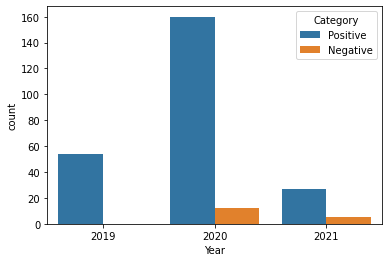

In [11]:
#plotting category of reviews by year
sns.countplot(x="Year",hue="Category",data=df3)

In [12]:
df3["Helpful_review"]=df3["Helpful_review"].replace("One",1).astype(int)

<AxesSubplot:xlabel='Year', ylabel='Helpful review'>

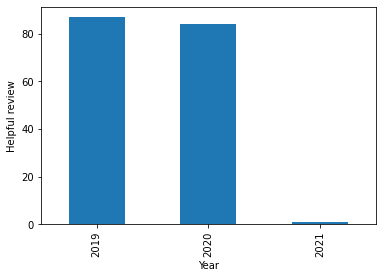

In [13]:
# most helpful review by year
plt.ylabel("Helpful reviewmax helpful
df3.groupby("Year")["Helpful_review"].max().plot.bar()

In [14]:
#calculating positive and negative reviews
df3["Category"].value_counts()

Positive    241
Negative     17
Name: Category, dtype: int64

In [15]:
reviews=df3["Review"]

In [16]:
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize

In [17]:
#words tokenize
words=[]
for i in reviews:
    words.append(word_tokenize(i)) 

In [18]:
words[0]

['This',
 'is',
 'an',
 'update',
 'for',
 'my',
 'previous',
 'review.Recently',
 ',',
 'I',
 'gave',
 'one',
 'star',
 'for',
 'the',
 'poor',
 'ebook',
 'experience',
 'but',
 'with',
 'author',
 "'s",
 'comment',
 'I',
 'realized',
 'the',
 'publisher',
 'updated',
 'the',
 'ebook',
 'and',
 'now',
 'everything',
 'is',
 'great',
 'in',
 'the',
 'ebook.As',
 'the',
 'name',
 'suggests',
 ',',
 'the',
 'book',
 'gives',
 'you',
 'a',
 'really',
 'hands-on',
 'experience',
 'on',
 'machine',
 'learning',
 '.',
 'This',
 'covers',
 'most',
 'of',
 'the',
 'recent',
 'main',
 'advancements',
 'in',
 'the',
 'field',
 '.']

In [19]:
#sentence tokenize
sentences=[]
for i in reviews:
    sentences.append(sent_tokenize(i))

In [20]:
sentences[0]

["This is an update for my previous review.Recently, I gave one star for the poor ebook experience but with author's comment I realized the publisher updated the ebook and now everything is great in the ebook.As the name suggests, the book gives you a really hands-on experience on machine learning.",
 'This covers most of the recent main advancements in the field.']

In [21]:
#splitting on positive and negative dataframe
positive=df3[df3["Category"]=="Positive"]
negative=df3[df3["Category"]=="Negative"]

## Analyzing positive reviews 

We are going to anaylze positive reviews which people found  helpful the most.

In [93]:
#selecting only top 10 helpful reviews
a=positive["Helpful_review"].sort_values(ascending=False)[:10]
a

2      87
1      84
3      68
4      31
5      25
113    16
240    15
146    14
6      13
7      13
Name: Helpful_review, dtype: int64

In [94]:
#top 10 helpful positive reviews
top_10=positive.loc[positive["Helpful_review"].isin(a)]
top_10

,Unnamed: 0,Rating,Year,Review,Helpful_review,Category
1,1,5,2020,This is an update for my previous review.Recen...,84,Positive
2,2,5,2019,I've read all of the predominant machine learn...,87,Positive
3,3,5,2019,This book gives you a hands-on approach to lea...,68,Positive
4,4,5,2019,I'm very pleased with this book. I enjoy the l...,31,Positive
5,5,5,2019,Aurelien did it again!Whether you are a data s...,25,Positive
6,6,5,2019,The book was worth the wait! The publication ...,13,Positive
7,7,5,2019,I'm finishing up an MCS in Data Science from U...,13,Positive
113,113,5,2019,"This book is tough, no doubt. But after seeing...",16,Positive
146,146,4,2020,"This review is only for book quality, surely i...",14,Positive
240,240,5,2020,基礎的な線性代数や統計学が分かれば、この一冊で実際に操作しながら勉強することができます。アク...,15,Positive


In [168]:
#making a list of all 10 helpful reviews
positive_text=[x for x in top_10["Review"]]
positive_text[:5]

['-I\'ve already spent several tens of hours with this book. The Kindle version is (I consider) overly expensive considering the number of issues.-Many of the notebooks and/or book code examples do not work and/or take inordinate amounts of time to compute.-I can\'t count the number of times I\'ve already had to go off and spend an hour or more updating or changingcode so that it works, whether it be from the book or from the latest notebooks (which the author claims tokeep up to date).-Explanations are often poor. For instance, when discussing false positives, false negatives, etc... He could havejust put all definitions in one place, like on wikipedia, but instead he tries to "word" everything out. It\'s not a very methodical way of instruction.-Another python book with so many breaking inter-dependencies that it boggles the mind - yet the author implies that "from the ground up" solutions are just "toys." Well, at least those toys will not break down when some part of your byzantine

In [96]:
#function for converting list to string
def list_to_string(text):
    str_1=" "
    return (str_1.join(text))

In [97]:
pos_text=list_to_string(positive_text)

In [98]:
from nltk.probability import FreqDist

In [99]:
#tokenize words
pos_tokens=word_tokenize(pos_text)
len(pos_tokens)

1584

In [219]:
#finding top 10 most frequent words
fdist=FreqDist(pos_tokens)
fdist.most_common(10)

[('the', 42),
 ('.', 34),
 ('book', 27),
 (',', 27),
 ('of', 25),
 ('I', 19),
 ('to', 18),
 ('is', 14),
 ('and', 14),
 ('not', 12)]

In [102]:
#cleaning words from punctuation
word_no_punct=[]
for w in pos_tokens:
    if w.isalpha():
        word_no_punct.append(w.lower())

In [103]:
word_no_punct[:10]

['this', 'is', 'an', 'update', 'for', 'my', 'previous', 'i', 'gave', 'one']

In [104]:
from nltk.corpus import stopwords

In [105]:
stopwords=stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [162]:
#removing stopwords(english)
clean_words=[]
for w in word_no_punct:
    if w not in stopwords:
        clean_words.append(w)
print(clean_words[:30])

['update', 'previous', 'gave', 'one', 'star', 'poor', 'ebook', 'experience', 'author', 'comment', 'realized', 'publisher', 'updated', 'ebook', 'everything', 'great', 'name', 'suggests', 'book', 'gives', 'really', 'experience', 'machine', 'learning', 'covers', 'recent', 'main', 'advancements', 'field', 'read']


In [128]:
#top 20 frequent words after cleaning
fdist=FreqDist(clean_words)
fdist.most_common(20)

[('book', 25),
 ('learning', 13),
 ('edition', 10),
 ('one', 7),
 ('machine', 7),
 ('well', 7),
 ('ml', 7),
 ('great', 6),
 ('like', 6),
 ('way', 6),
 ('read', 5),
 ('python', 5),
 ('makes', 5),
 ('look', 4),
 ('print', 4),
 ('deep', 4),
 ('reading', 4),
 ('math', 4),
 ('also', 4),
 ('would', 4)]

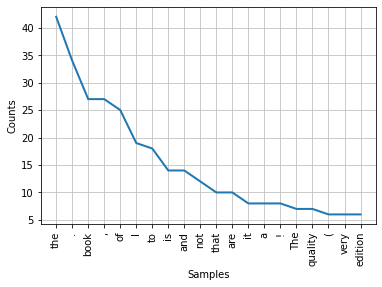

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [220]:
#ploting 
fdist.plot(20)

In [118]:
from wordcloud import WordCloud

In [121]:
text=list_to_string(fdist)

In [122]:
wordcloud=WordCloud().generate(text)

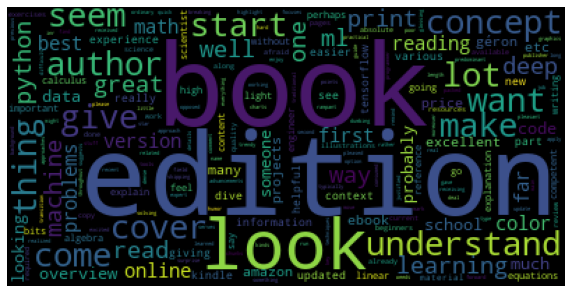

In [136]:
#image of frequent words
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [145]:
#Parts of Speech Tagging
tagged=nltk.pos_tag(clean_words)
tagged[:10]

[('update', 'JJ'),
 ('previous', 'JJ'),
 ('gave', 'VBD'),
 ('one', 'CD'),
 ('star', 'NN'),
 ('poor', 'JJ'),
 ('ebook', 'NN'),
 ('experience', 'NN'),
 ('author', 'NN'),
 ('comment', 'NN')]

In [149]:
#finding only adjectives
jj_tagged = [(word,tag) for word, tag in tagged 
                if tag.startswith('JJ')]

In [152]:
jj_tagged[:10]

[('update', 'JJ'),
 ('previous', 'JJ'),
 ('poor', 'JJ'),
 ('updated', 'JJ'),
 ('great', 'JJ'),
 ('experience', 'JJ'),
 ('recent', 'JJ'),
 ('main', 'JJ'),
 ('predominant', 'JJ'),
 ('related', 'JJ')]

In [158]:
#top 20 most frequent adjectives
fdist_jj=FreqDist(jj_tagged)
fdist_jj.most_common(20)

[(('great', 'JJ'), 6),
 (('learning', 'JJ'), 4),
 (('best', 'JJS'), 3),
 (('first', 'JJ'), 3),
 (('deep', 'JJ'), 3),
 (('ml', 'JJ'), 3),
 (('excellent', 'JJ'), 3),
 (('many', 'JJ'), 3),
 (('new', 'JJ'), 2),
 (('kindle', 'JJ'), 2),
 (('helpful', 'JJ'), 2),
 (('print', 'JJ'), 2),
 (('easier', 'JJR'), 2),
 (('various', 'JJ'), 2),
 (('dive', 'JJ'), 2),
 (('important', 'JJ'), 2),
 (('linear', 'JJ'), 2),
 (('high', 'JJ'), 2),
 (('competent', 'JJ'), 2),
 (('current', 'JJ'), 2)]

We can see we have a a positive adjective like "best","great","excellent","easier","important". We can assume based on those adjective that the book is great and easy to understand.

## Negative reviews

We are going to anaylze negative reviews which people found  helpful the most.

In [163]:
b=negative["Helpful_review"].sort_values(ascending=False)[:10]
b

144    19
150    13
174     3
17      3
24      2
97      1
91      1
13      1
225     0
104     0
Name: Helpful_review, dtype: int64

In [164]:
#top 10 helful negative reviews
top_10=negative.loc[negative["Helpful_review"].isin(b)]
top_10

,Unnamed: 0,Rating,Year,Review,Helpful_review,Category
13,13,2,2021,-I've already spent several tens of hours with...,1,Negative
17,17,1,2020,I bought the book from vendor Globalmart Onlin...,3,Negative
24,24,1,2020,I am using the kindle app on my ipad to view t...,2,Negative
31,31,1,2021,"The content of the book seems pretty good, alt...",0,Negative
68,68,1,2020,Damaged book received.,0,Negative
80,80,1,2020,I purchased the book 2 months ago and have slo...,0,Negative
81,81,1,2021,"The contents of the book are incredible. But,...",0,Negative
91,91,1,2020,The book that I received was clearly used before.,1,Negative
97,97,1,2020,The product and the box are damaged and wrinkl...,1,Negative
104,104,1,2021,the book’s paper is very thin. Doesn’t feel li...,0,Negative


In [170]:
negative_text=[x for x in top_10["Review"]]
negative_text[:5]

['-I\'ve already spent several tens of hours with this book. The Kindle version is (I consider) overly expensive considering the number of issues.-Many of the notebooks and/or book code examples do not work and/or take inordinate amounts of time to compute.-I can\'t count the number of times I\'ve already had to go off and spend an hour or more updating or changingcode so that it works, whether it be from the book or from the latest notebooks (which the author claims tokeep up to date).-Explanations are often poor. For instance, when discussing false positives, false negatives, etc... He could havejust put all definitions in one place, like on wikipedia, but instead he tries to "word" everything out. It\'s not a very methodical way of instruction.-Another python book with so many breaking inter-dependencies that it boggles the mind - yet the author implies that "from the ground up" solutions are just "toys." Well, at least those toys will not break down when some part of your byzantine

In [171]:
neg_text=list_to_string(negative_text)

In [173]:
neg_tokens=word_tokenize(neg_text)
len(neg_tokens)

807

In [174]:
#cleaning from punctuation
word_no_punct=[]
for w in neg_tokens:
    if w.isalpha():
        word_no_punct.append(w.lower())

In [175]:
word_no_punct[:10]

['already',
 'spent',
 'several',
 'tens',
 'of',
 'hours',
 'with',
 'this',
 'book',
 'the']

In [176]:
#removing stopwords
clean_words=[]
for w in word_no_punct:
    if w not in stopwords:
        clean_words.append(w)
print(clean_words[:30])

['already', 'spent', 'several', 'tens', 'hours', 'book', 'kindle', 'version', 'consider', 'overly', 'expensive', 'considering', 'number', 'notebooks', 'book', 'code', 'examples', 'work', 'take', 'inordinate', 'amounts', 'time', 'ca', 'count', 'number', 'times', 'already', 'go', 'spend', 'hour']


In [177]:
#top 20 most frequent words after cleaning
fdist=FreqDist(clean_words)
fdist.most_common(20)

[('book', 27),
 ('quality', 7),
 ('edition', 7),
 ('pages', 5),
 ('second', 5),
 ('like', 4),
 ('first', 4),
 ('page', 4),
 ('received', 4),
 ('version', 3),
 ('updated', 3),
 ('amazon', 3),
 ('good', 3),
 ('damaged', 3),
 ('used', 3),
 ('already', 2),
 ('kindle', 2),
 ('number', 2),
 ('notebooks', 2),
 ('time', 2)]

In [178]:
text=list_to_string(fdist)

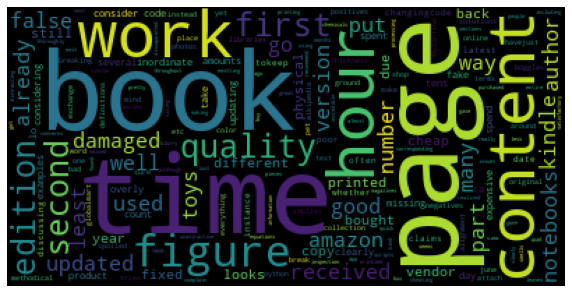

In [180]:
wordcloud=WordCloud().generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [181]:
#Parts of Speech Tagging
tagged=nltk.pos_tag(clean_words)
tagged[:10]

[('already', 'RB'),
 ('spent', 'JJ'),
 ('several', 'JJ'),
 ('tens', 'NNS'),
 ('hours', 'NNS'),
 ('book', 'NN'),
 ('kindle', 'JJ'),
 ('version', 'NN'),
 ('consider', 'VBP'),
 ('overly', 'RB')]

In [182]:
#finding only adjectives
jj_tagged = [(word,tag) for word, tag in tagged 
                if tag.startswith('JJ')]

In [183]:
jj_tagged[:10]

[('spent', 'JJ'),
 ('several', 'JJ'),
 ('kindle', 'JJ'),
 ('expensive', 'JJ'),
 ('inordinate', 'JJ'),
 ('spend', 'JJ'),
 ('latest', 'JJS'),
 ('notebooks', 'JJ'),
 ('poor', 'JJ'),
 ('false', 'JJ')]

In [186]:
#top 40 most frequent adjectives
fdist_jj=FreqDist(jj_tagged)
fdist_jj.most_common(40)

[(('second', 'JJ'), 5),
 (('first', 'JJ'), 4),
 (('good', 'JJ'), 3),
 (('kindle', 'JJ'), 2),
 (('false', 'JJ'), 2),
 (('many', 'JJ'), 2),
 (('least', 'JJS'), 2),
 (('due', 'JJ'), 2),
 (('different', 'JJ'), 2),
 (('quality', 'JJ'), 2),
 (('amazon', 'JJ'), 2),
 (('physical', 'JJ'), 2),
 (('spent', 'JJ'), 1),
 (('several', 'JJ'), 1),
 (('expensive', 'JJ'), 1),
 (('inordinate', 'JJ'), 1),
 (('spend', 'JJ'), 1),
 (('latest', 'JJS'), 1),
 (('notebooks', 'JJ'), 1),
 (('poor', 'JJ'), 1),
 (('methodical', 'JJ'), 1),
 (('author', 'JJ'), 1),
 (('toys', 'JJ'), 1),
 (('break', 'JJ'), 1),
 (('bought', 'JJ'), 1),
 (('globalmart', 'JJ'), 1),
 (('bad', 'JJ'), 1),
 (('original', 'JJ'), 1),
 (('june', 'JJ'), 1),
 (('sure', 'JJ'), 1),
 (('app', 'JJ'), 1),
 (('great', 'JJ'), 1),
 (('fixed', 'JJ'), 1),
 (('similar', 'JJ'), 1),
 (('last', 'JJ'), 1),
 (('content', 'JJ'), 1),
 (('satisfactory', 'JJ'), 1),
 (('less', 'JJR'), 1),
 (('damaged', 'JJ'), 1),
 (('purchased', 'JJ'), 1)]

We can see we have a a negative adjective like "false","expensive","poor","damaged". We can assume based on those adjective that for some people book is too expensive,has false information and some of them got damaged book.
Because there are a lot more positive then negative reviews (241:17) we can say that for most people book is good.